# K Means
I outline the theory under [chapter 9](notebooks/books/pattern-recognition-and-ml/chapters/chapter_9.ipynb) of `pattern recognition and machine learning`.

`K-means` is a bit limiting since it can't accurately capture the geometry of your data. For example, if you have two concentric circles, `k-means` will not be able to split this data by group. 

In [65]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def my_kmeans(X, n_clusters):
    iterno = 15
    print(f"Inpute shape: {X.shape}")
    print(f"Number of clusters to find: {n_clusters}")
    
    # initialize cluster centers
    
    rnd_x = np.random.randint(X.shape[0], size=n_clusters)
    rnd_y = np.random.randint(X.shape[1], size=n_clusters)

    cluster_centers = X[rnd_x, rnd_y, :]
    labels = np.zeros((X.shape[0], X.shape[1])).astype(np.int)
    for i in range(iterno): 
        print(f"iter: {i}, diff: ", end="")

        scores = np.ones((X.shape[0], X.shape[1])) * 1e5

        for i in range(n_clusters):
            c = np.linalg.norm(X - cluster_centers[i, :], axis=2)
            ix, iy = np.where(c < scores)    
            scores[ix, iy] = c[ix, iy]
            labels[ix, iy] = i
            
        clusters = np.array([X[np.where(labels == i)] for i in range(n_clusters)])
        new_cluster_centers = np.array([arr.mean(axis=0) for arr in clusters])
        
        diff = np.sum(np.sqrt(np.sum((cluster_centers - new_cluster_centers) ** 2, axis=1)))
        print(f"{diff: 0.2f}")
        if diff < 0.02:
            break
        else:
            cluster_centers = new_cluster_centers
    return labels, cluster_centers

n_clusters = 2
# labels, centers = my_kmeans(image, n_clusters)

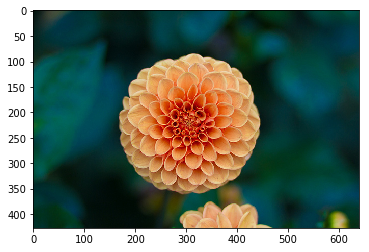

In [69]:
from sklearn.datasets import load_sample_image, load_sample_images

data = load_sample_images()
X = data['images'][1] # flower
plt.imshow(X);

Inpute shape: (427, 640, 3)
Number of clusters to find: 3
iter: 0, diff:  359.70
iter: 1, diff:  134.03
iter: 2, diff:  2.78
iter: 3, diff:  1.01
iter: 4, diff:  0.50
iter: 5, diff:  0.26
iter: 6, diff:  0.13
iter: 7, diff:  0.04
iter: 8, diff:  0.04
iter: 9, diff:  0.02
iter: 10, diff:  0.00


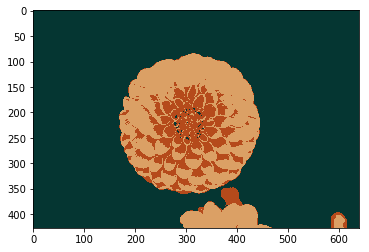

In [67]:
labels, centers = my_kmeans(X, 3)

res = np.zeros(X.shape).astype(np.int)

for i in range(np.array(centers).shape[0]):
    idx, idy = np.where(labels == i)
    res[idx, idy, :] = centers[i]
plt.imshow(res);